# **Protein Structure**

This module serves as an introductory module for drug design, and any undergraduate student can use this module to learn the protein structure. The module starts with learning basic protein structures in detail, including primary, secondary, tertiary, and quaternary structures with examples. Also, it provides the physicochemical basis of principles of protein 3D structure. Each part involves examples and tutorials using visualization software. Assignments are provided to test the user’s knowledge, and users can utilize the tutorial they go through to solve the assignment problem. Public online software for protein sequence analysis, such as Uniprot, and protein data bank, is used for analysis. Visualization can be done by  PyMol software. 3D visualization also involves binding site analysis of different protein-drug interactions and comparison of binding sites of different proteins. For proteins that do not have 3D structures elucidated by experimental methods, a prediction is performed using homology modeling using Colab Alpha Fold.

## **Learning Objectives:**
To visualize the 3D structure of proteins and describe the details of secondary, tertiary, and quaternary structures.
To compare protein sequences and explain the similarity in protein sequences. To model the 3D structure of proteins based on homology modeling.
To analyze the interface of protein-protein interactions by visualization of protein surfaces between the two interacting proteins. Find the secondary structure elements responsible for holding the ligand and the receptor proteins. Analyze the protein surfaces for charge and hydrophobicity using 3D structure tools.


### **Prerequisites**
Vertex AI Workbench
DSSP
Clustaal
PyMol

### **Packages**
!pip install -q py3Dmol biopython nglview matplotlib

## **Why Study Protein Structure for Drug Design?**

Understanding protein structure is a fundamental aspect of drug discovery due to proteins' critical roles in nearly every cellular process. Human cells are estimated to contain approximately 50,000 types of proteins facilitating various biological and physiological functions. Among these proteins, about 97% are targeted by drugs for therapeutic purposes. The breakdown of drug targets is as follows:
G-protein-coupled receptors (GPCRs): 33% of drug targets
Nuclear receptors: 16% of drug targets
Enzymes and kinases: 30% of drug targets
Ion channels and transporter proteins: 18% of drug targets
Other targets (e.g., DNA and miscellaneous): 3%
The high proportion of protein targets emphasizes the importance of understanding protein structure for designing effective drugs that interact specifically with these targets to modulate their activity.


# **1.0 Amino Acids**
## **1.1 Basic Composition of Proteins**
Proteins are complex macromolecules made up of amino acids, which serve as the basic building blocks. Each protein's unique 3D structure is formed by the specific sequence and interactions between its amino acids. To understand how these structures form and function, it is essential to start with the basics of amino acids.

## **1.2 Types of Amino Acids and Their Properties**
There are 20 standard amino acids, each with distinct properties defined by their R-groups:

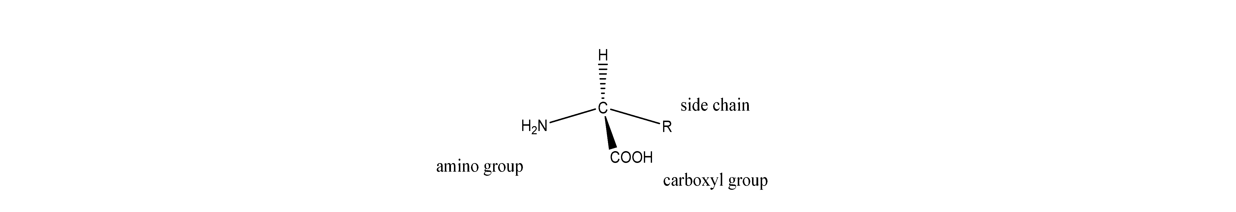

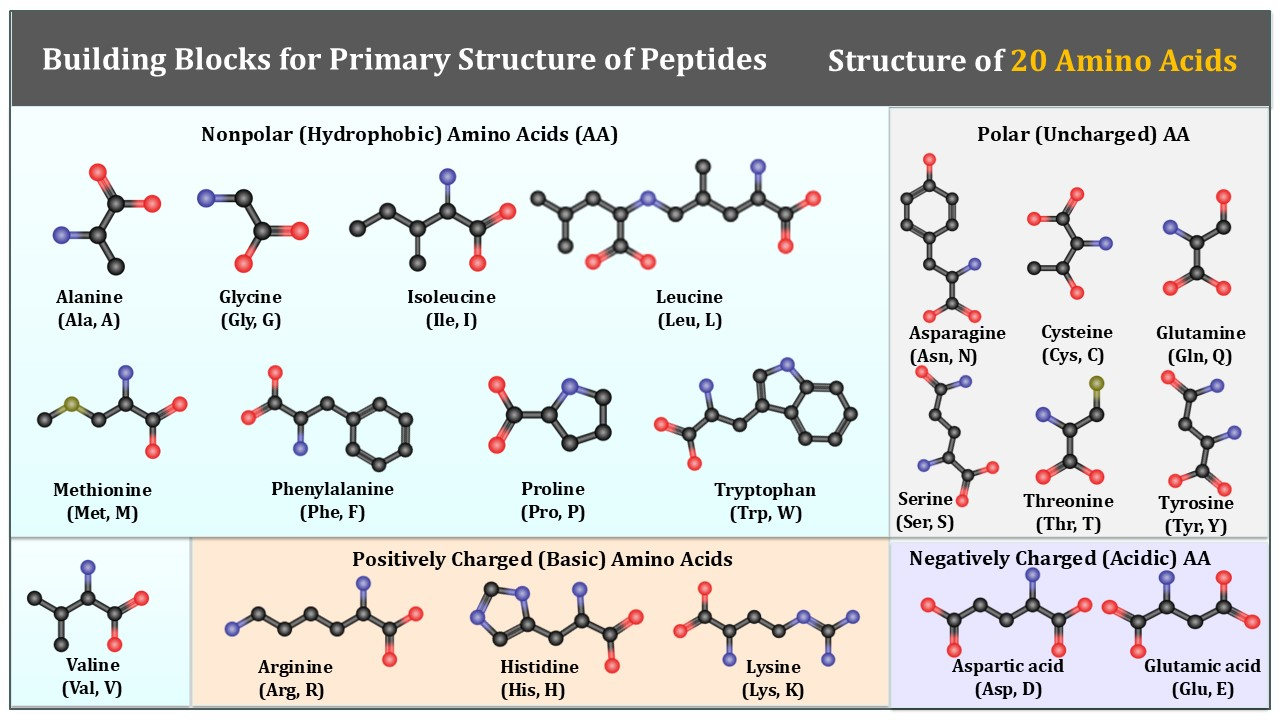

- Nonpolar (Hydrophobic): e.g., leucine, valine, and isoleucine, which prefer to be buried inside the protein away from water.
- Polar (Uncharged): e.g., serine, threonine, and asparagine, which can form hydrogen bonds and are often found on the protein surface.
- Positively Charged (Basic): e.g., lysine, arginine, and histidine, which participate in ionic interactions.
- Negatively Charged (Acidic): e.g., aspartic acid and glutamic acid, which also engage in ionic bonds.
- Aromatic: e.g., phenylalanine, tyrosine, and tryptophan, which can participate in hydrophobic and π-π interactions.

These properties influence how amino acids interact with each other and how the overall protein folds and functions.

Peptide Bonds and Protein Formation: Peptide bonds are formed through a condensation reaction between the carboxyl group of one amino acid and the amino group of another, releasing water. These bonds have partial double-bond character due to resonance, which restricts rotation and gives the peptide bond a planar configuration. This planarity is key in the formation of secondary structures like alpha helices and beta sheets. Proteins can be described using one-letter and three-letter abbreviations of amino acids, making sequence notation more compact for analysis.

Each amino acid has an α-carbon atom (see Figure below) as a backbone atom. R-group or side chain carbons are labeled by Greek alphabets starting from α carbon atom.


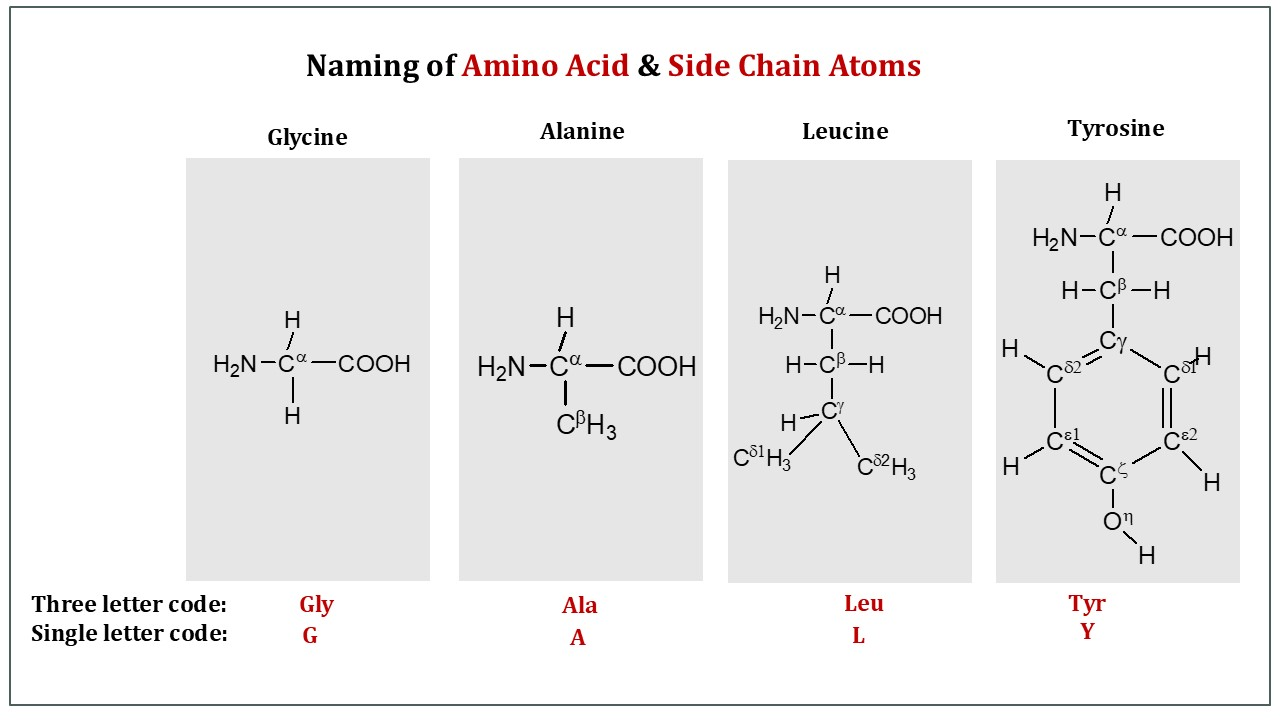

# **2.0 Protein Structure**
# **2.1 Primary Structure**
Primary structure refers to the linear sequence of amino acids in a polypeptide chain. The sequence is encoded by genes and ultimately determines the 3D structure and function of the protein.


In [2]:
!apt-get install -y pymol

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apbs apbs-data freeglut3 libapbs3 libevdev2 libglu1-mesa libgudev-1.0-0 libinput-bin libinput10
  libmaloc1 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5
  libqt5network5 libqt5opengl5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt5widgets5 libqt5xml5 libwacom-bin libwacom-common libwacom9 libxcb-icccm4
  libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0
  libxcb-xkb1 libxkbcommon-x11-0 pymol-data python3-numpy python3-opengl python3-pymol
  python3-pyqt5 python3-pyqt5.qtopengl python3-pyqt5.sip qt5-gtk-platformtheme qttranslations5-l10n
Suggested packages:
  qt5-image-formats-plugins qtwayland5 python-numpy-doc python3-pytest libgle3
The following NEW packages will be installed:
  apbs apbs-data freeglut3 libapbs3 libevdev

In [4]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.8 MB/s eta 0:00:00


In [5]:
from Bio import SeqIO, Entrez

# Fetch protein sequence from NCBI
def fetch_protein_sequence(accession):
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    handle.close()
    return seq_record

accession = "YP_009724390.1"  # Example accession number
protein_seq_record = fetch_protein_sequence(accession)

# Print sequence and basic properties
print(f"Sequence ID: {protein_seq_record.id}")
print(f"Sequence Length: {len(protein_seq_record.seq)}")
print(f"Sequence: {protein_seq_record.seq}")

/usr/local/lib/python3.10/dist-packages/Bio/Entrez/__init__.py:734: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


Sequence ID: YP_009724390.1
Sequence Length: 1273
Sequence: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSS

# **2.2 Secondary Structure**
Localized folding patterns within a protein, such as alpha helices and beta sheets, are stabilized by hydrogen bonds. These structures serve as building blocks for the protein's overall shape. Secondary structure refers to how the backbone atoms are oriented in space providing a particular shape for the protein chain.
Alpha-Helix: A coiled structure with hydrogen bonds between the backbone N-H group of one amino acid and the C=O group four residues earlier. The alpha-helix is a common structural motif in many proteins, including enzymes and transport proteins.
Beta-Sheet: Composed of beta strands connected laterally by hydrogen bonds. These can form parallel or antiparallel sheets, giving rise to a pleated sheet appearance. Beta sheets are often found in the core of globular proteins and are involved in forming the active sites of enzymes.
Beta-Turn: A tight loop that allows the polypeptide chain to reverse direction. Beta-turns are stabilized by hydrogen bonds and are often located on the protein surface, helping proteins form compact shapes.

We will use PyMol. Get familiar with PyMol GUI and command model

Some basic GUI commands in PyMol is provided in a figure below.


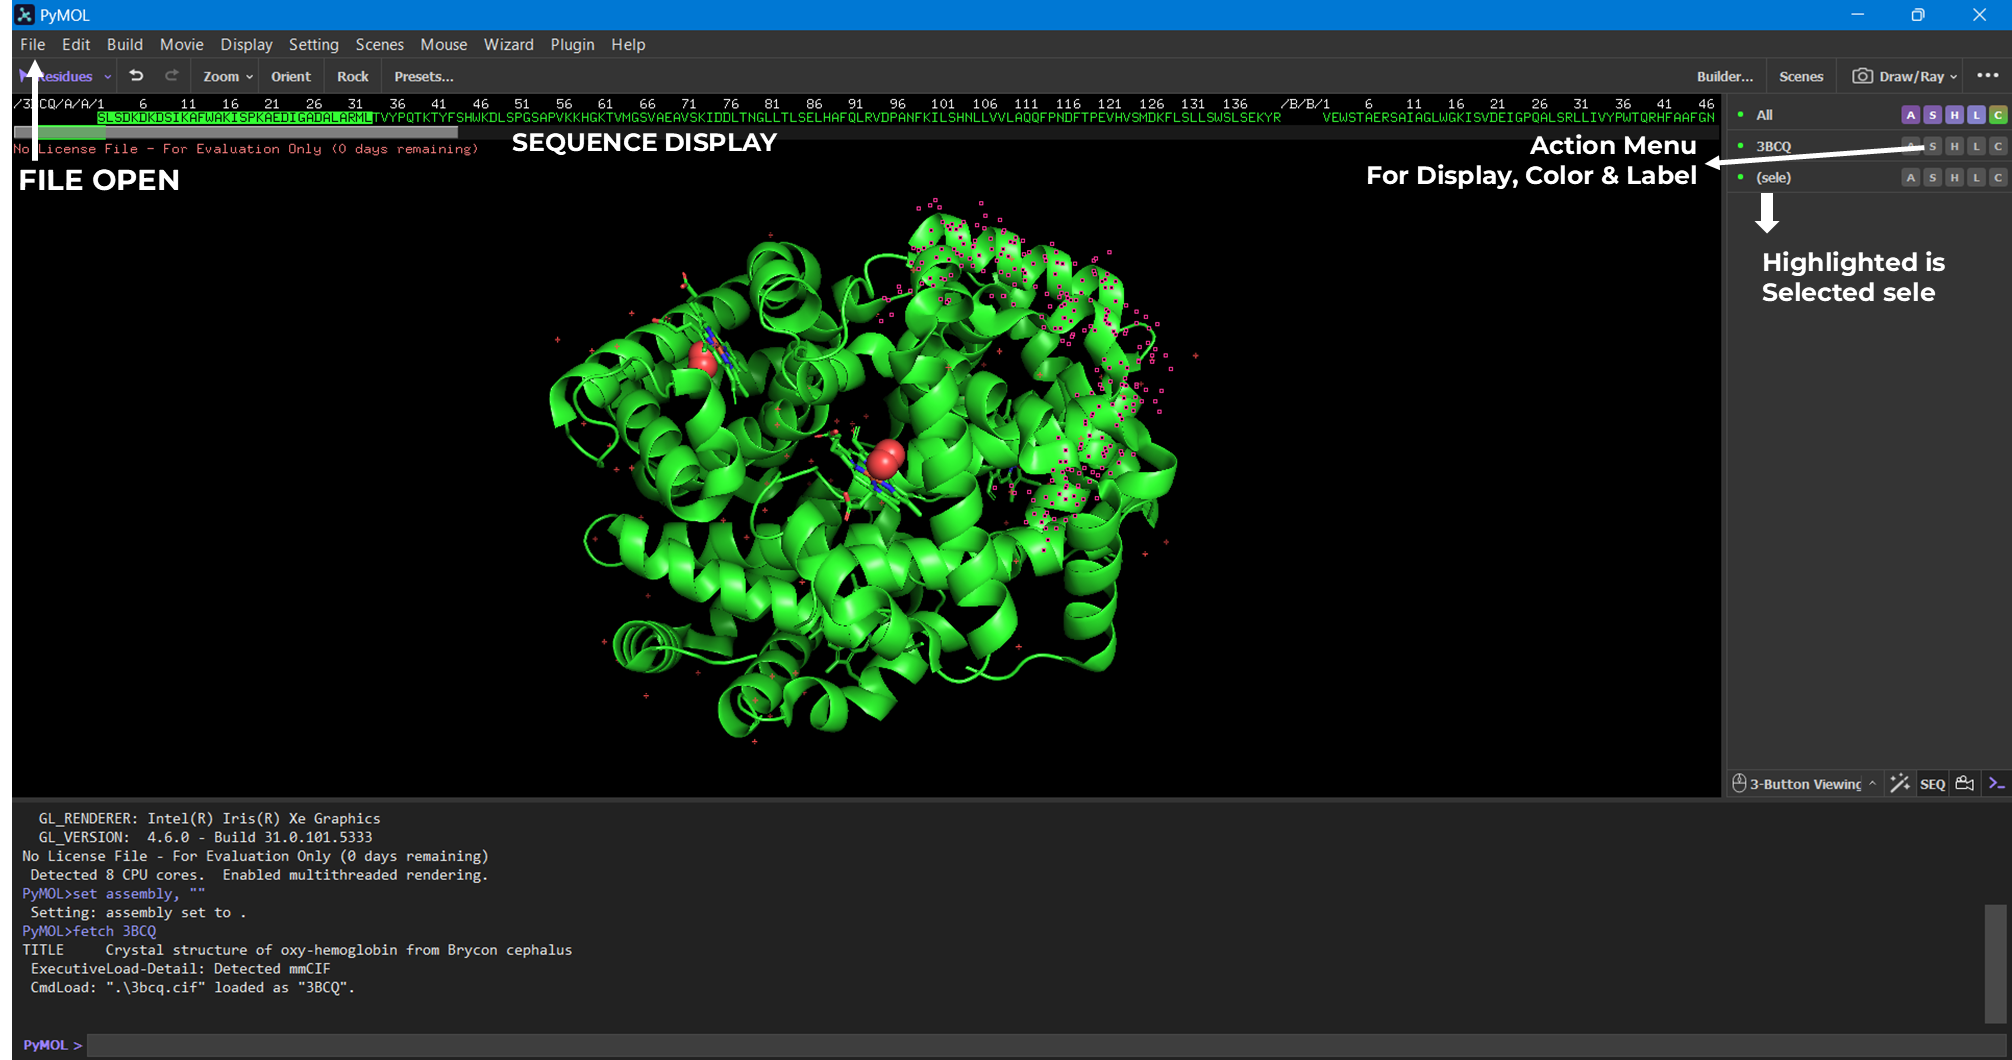

## 🌟 **Activity: Visualization of Protein Structure Levels**

**Objective:**
To visualize the **primary** and **secondary** structures of a protein using PyMOL's GUI and command modes.

### **Steps to Perform the Activity**

#### **Protein Retrieval:**
**Protein Data Bank (PDB) ID Used:** PDB ID: `3BCQ`

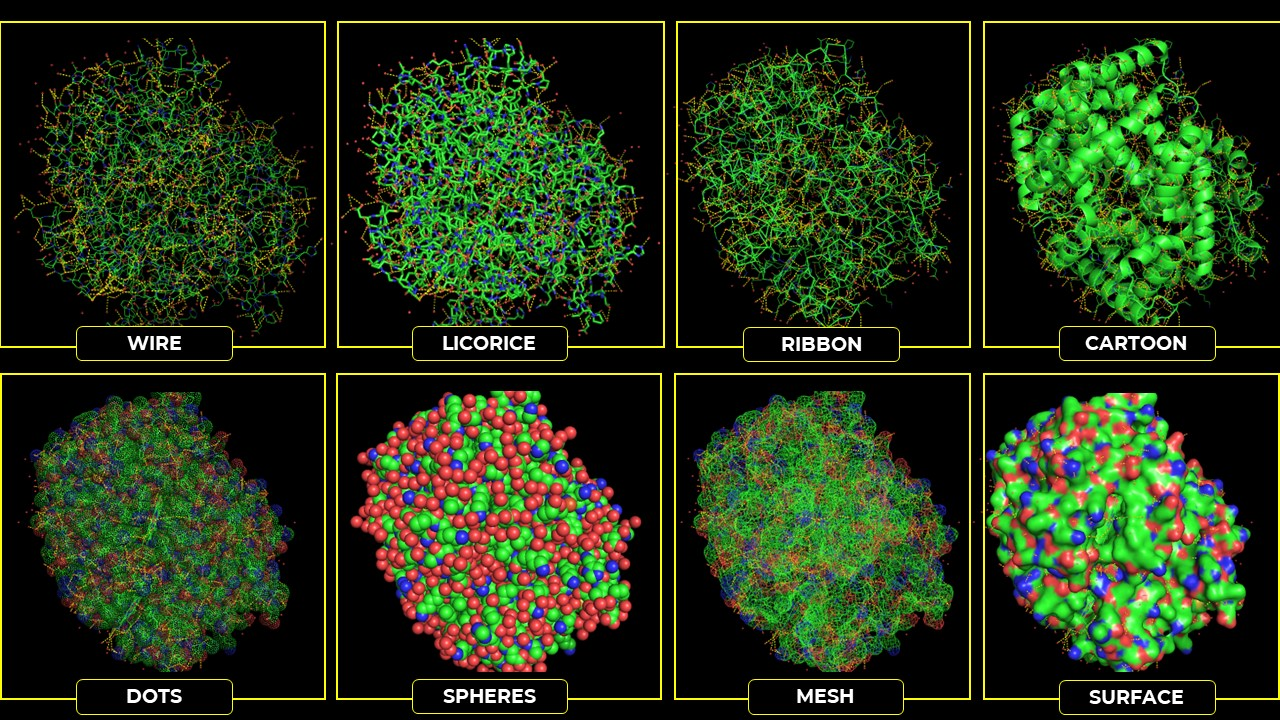

Once your protein is loaded, let’s explore different ways to visualize it. PyMOL offers multiple representations to help us understand different features of the protein. You can do this using the PyMOL GUI, the PyMOL command line, or by performing analysis with Python.

### **I. GUI Steps**



**Load the Structure:**

1. Open PyMOL, then click on `File > Open` and select your PDB file `3BCQ`.
Show Different Representations:
2. To view the structure in a specific format, click on Show (S) next to the loaded structure in the right-hand panel.

**Select Representation Type:**
- **Cartoon:** Show the backbone and secondary structure.
- **Sticks:** Show atomic details of bonds, useful for small molecules and ligands.
- **Surface:** Show the surface of the protein to understand shape and accessibility.
- **Spheres:** Show atoms as space-filling spheres.
- **Lines:** Display simple atomic connectivity.

3. Just click Show > [Representation Type] to switch between these formats.

### **II. Command Line Steps**

Using the command line is an efficient way to quickly change representations in PyMOL. The following commands will help:

**Hide Everything First**
`hide everything, all`

**Show Cartoon**
`show cartoon, all`

**Show Sticks for Ligands**
`select ligand, organic`
`show sticks, ligand`

**Show Surface**
`show surface, all`

**Show Spheres**
`show spheres, all`

**Show Lines**
`show lines, all`

#### **Step 1: Select Specific Chains**
**A Chain:** This selects chain A of the protein.
  ```
  PyMol> select /3BCQ/A/A/
  ```

#### **Step 2: Apply Colors to Chains**
**Chain A:**  Colors chain A **red**.
  ```
  PyMol> color red, /3BCQ/A/A/
  ```

**Chain D:**  Colors chain D **yellow**.
  ```
  PyMol> color yellow, /3BCQ/D/D/
  ```

**Chain B:**  Colors chain B **cyan**.
  ```
  PyMol> color cyan, /3BCQ/B/B/
  ```
**Backbone Representation:** The visualization showcases the **backbone atoms' arrangement** in space. This arrangement highlights the **secondary structure** of the protein, such as **alpha-helices** and **beta-sheets**.

### **III. Python Code**

You can automate switching between representations using a Python script:

In [6]:
import pymol
from pymol import cmd

# Start PyMOL in a headless mode
pymol.finish_launching(['pymol', '-cq'])

# Specify the format as PDB when fetching
cmd.fetch("1ubq", type="pdb")

'1ubq'

In [7]:
# Or load a local file
cmd.load("/content/1ubq.pdb")

In [8]:
!pip install py3Dmol

import py3Dmol

# Visualize the protein using py3Dmol
view = py3Dmol.view(query='pdb:1ubq')  # replace with your PDB ID
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# **2.3 Tertiary Structure**
GUI mode
Select one of the chains using the sequence displayed at the top of the screen,
Example from residues 1 to 142 and display them as sticks


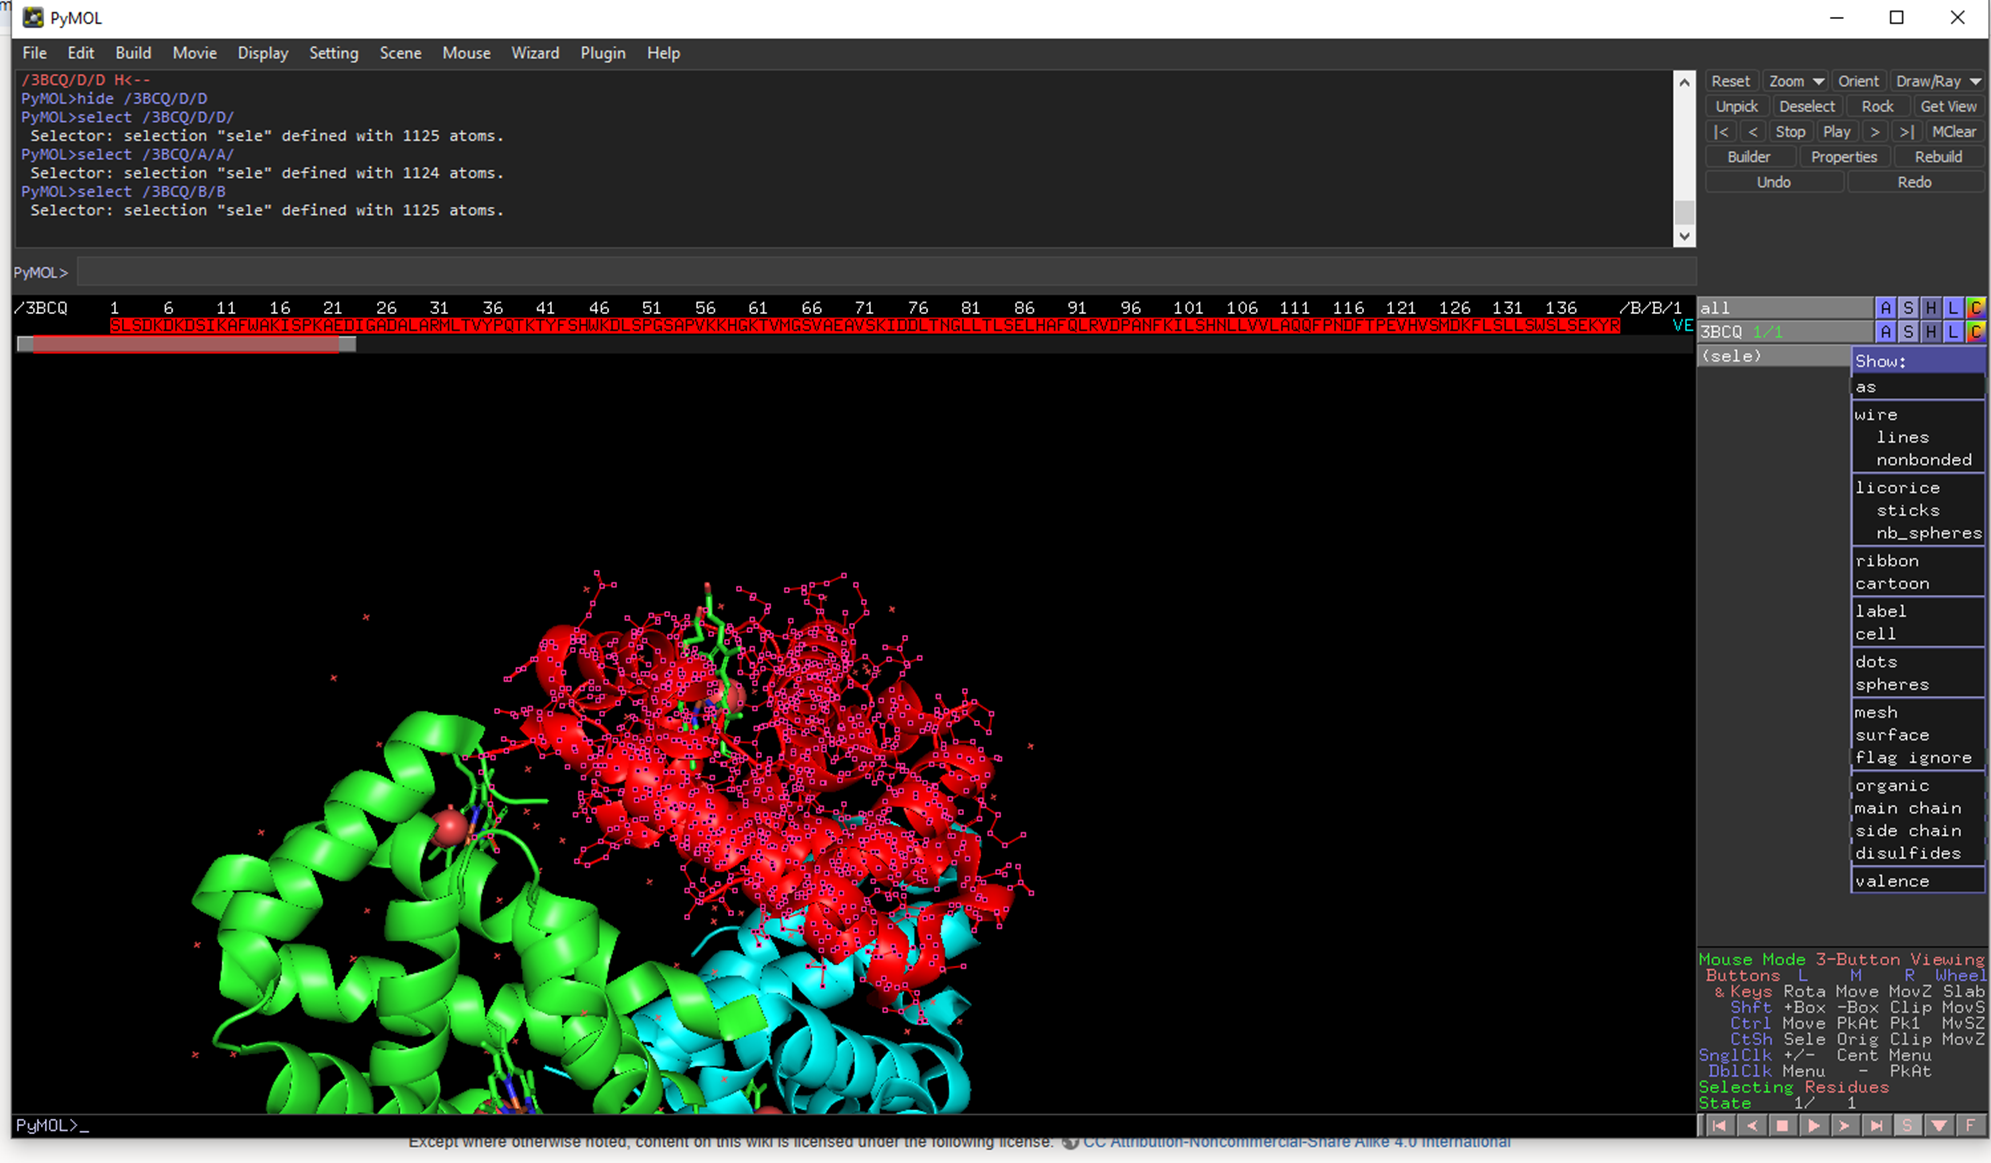

Deselect by clicking anywhere on the blank screen. Zoom the structure; you will see that chain A, displayed in red, has side chains as sticks.  Backbone atoms with side chains is tertiary structure.

## 🌟 **Activity Coloring and Representation Analysis**

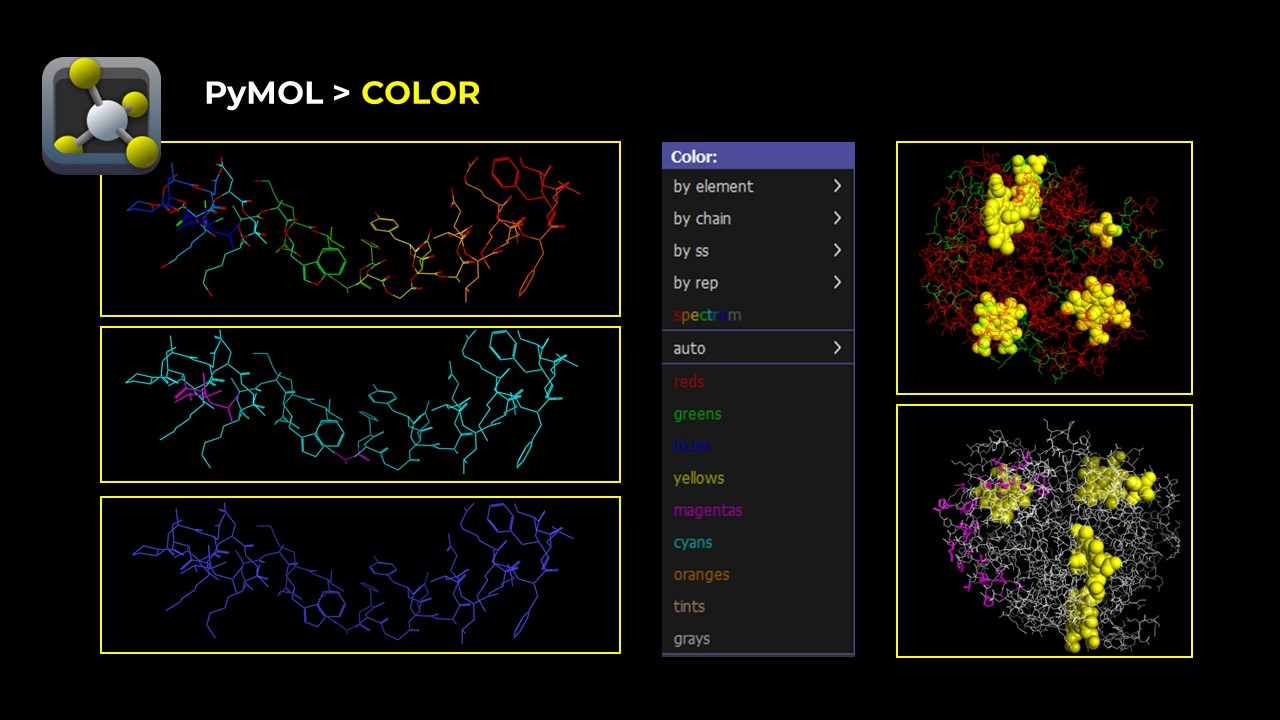

In this activity, we will explore how to apply colors to different parts of a protein structure using PyMOL to highlight specific features. We’ll cover:

Secondary Structure Coloring: Color different parts of the secondary structure (α-helices, β-sheets, loops).
Chain-Specific Coloring: Assign colors to distinguish different chains.
Element-Based Coloring: Color atoms by element type or chemical properties.
Let's get started with a concise step-by-step guide for each of these tasks.

## **I. GUI Steps**


### **A. Secondary Structure Coloring:**

1. Click on the C (Color) button next to the object in the right panel.
2. Select By SS (Secondary Structure) > Select the kind of color you want for Helix,Sheet and Loop.

This will automatically assign colors to α-helices, β-sheets, and loops.

### **B. Chain-Specific Coloring:**

1. Click on the C (Color) button next to the object.
2. Select By Chain from the dropdown menu.
3. Choose between different options:
- By Chain (elem C) or By Chain (*/CA) to color based on different chain elements or chain identifiers.
- You can also use Chainbows if you want a rainbow-like effect across different chains.

You can pick specific colors for each chain, such as red for Chain A and blue for Chain B, from the color panel below.

### **C. Element-Based Coloring:**
1. Click the C (Color) button next to the object.
2. Select By Element from the dropdown menu.
3. This will assign colors based on the element type:
- Carbon (C): Generally gray by default.
- Oxygen (O): Red.
- Nitrogen (N): Blue.
- Sulfur (S): Yellow.

You can also manually change the color by selecting the desired element type and picking a color from the color options.


## **II.Command Line Steps**

Using the command line allows for precise and rapid modifications. Here are the steps to apply different coloring schemes:

### **Secondary Structure Coloring**

**Color α-helices yellow** `color yellow, ss h`

**Color β-sheets cyan** `color cyan, ss s`   

**Color loops green** `color green, ss l`  

### **Chain-Specific Coloring**

**Color Chain A red** `color red, chain A`

**Color Chain B blue** `color blue, chain B`

### **Element-Based Coloring**

**Color oxygen atoms red** `color red, elem O`

**Color blue, elem N** `Color nitrogen atoms blue`

**Color gray, elem C** `Color carbon atoms gray`

# **2.4 Quaternary Structure**
Notice that hemoglobin has four chains, and these chains are displayed in different colors. These chains are not connected by covalent bonds and have a multimeric structure; hence, hemoglobin has a quaternary structure.


# **2.5 How is the helical structure in protein stabilized?**

Helical structures are stabilized by hydrogen bonds


We will use GUI mode for hydrogen bond and labels and see the pattern of hydrogen bonds

### 🌟 **Activity: Visualizing Hydrogen Bonding and Stabilization of Helical Structure**

**Objective:**  
To visualize **hydrogen bonding** and understand the stabilization pattern of a helical structure using PyMOL.

### **Steps to Perform the Activity**

#### **Step 1: Prepare the PDB File**
1. **Locate the File:**  
   - The required PDB file is named **`helix.pdb`**. Download the helix.pdb file from submodule 1 folder on Github.
   - Ensure it is saved in an accessible folder on your computer (e.g., `Downloads` or a specific folder for this activity).

2. **Load the File in PyMOL:**
   **Using the GUI Mode:**
     - Go to the menu:  
       **File > Open**.
     - Navigate to the folder containing **`helix.pdb`** and load it.
   **Using the Command Mode:**
     ```
     PyMol> load helix.pdb
     ```
If the molecule is displayed with a cartoon helical structure
```
PyMol>hide cartoon
PyMol>show lines
```
We will use GUI mode for hydrogen bond and labels and see the pattern of hydrogen bonds

Hydrogen bond interaction table can be generated using the following:
https://psa-lab.github.io/HbindViz/user_guide/

#### **Step 2: Display the Protein Sequence**
1. **Show Sequence:**  
   Navigate to:  
     `Display > Sequence`
   
   The **protein sequence** will appear at the top of the PyMOL interface.

2. **Select Specific Sequence:**  
   Use the **left mouse button** to select a region of the sequence displayed at the top.

#### **Step 3: Highlight Hydrogen Bonds**
1. **Find Polar Contacts:**
   - With the selected sequence:
     - Navigate to:  
       `Sele > Action > Find > Polar Contacts > Within Selection`
   - This highlights **hydrogen bonds** (yellow lines) within the selection.

2. **Label the Residues:**
   - Navigate to:  
     `Sele > Label > Residues`  
   - The labels of the residues will now appear.

#### **Step 4: Visualize and Analyze the Structure**
1. **Zoom into the Structure:**
   Adjust the zoom to observe the **yellow lines** representing hydrogen bonds.

2. **Key Observations:**
   Notice that **Trp14 NH** forms a hydrogen bond with **Ile10 C=O**.  
     - This is an **i to i+4 pattern**, where `i` represents the first residue (**Ile10**) and **Trp14** is **4 residues away**.
   
   Similarly, observe **Phe13 C=O** hydrogen bonded to **Ile17 NH**.  
     - This pattern stabilizes the helical structure.
   
   **Helical Backbone and Side Chains:**
     - The **backbone** lies at the center of the helix.
     - The **side chains** (tertiary structure) radiate outward from the helix, further contributing to structural stability.

### **Understanding the Visualization**
**Hydrogen Bonds (Yellow Lines):**  
  - These bonds play a crucial role in stabilizing the helix.
  - The **i to i+4 pattern** is characteristic of alpha-helices, providing structural integrity.

**Residue Labeling:**  
  - Labels help identify specific residues participating in hydrogen bonding.

**Side Chain Orientation:**  
  - Side chains extend outward, ensuring space for interactions and functionality in the tertiary structure.

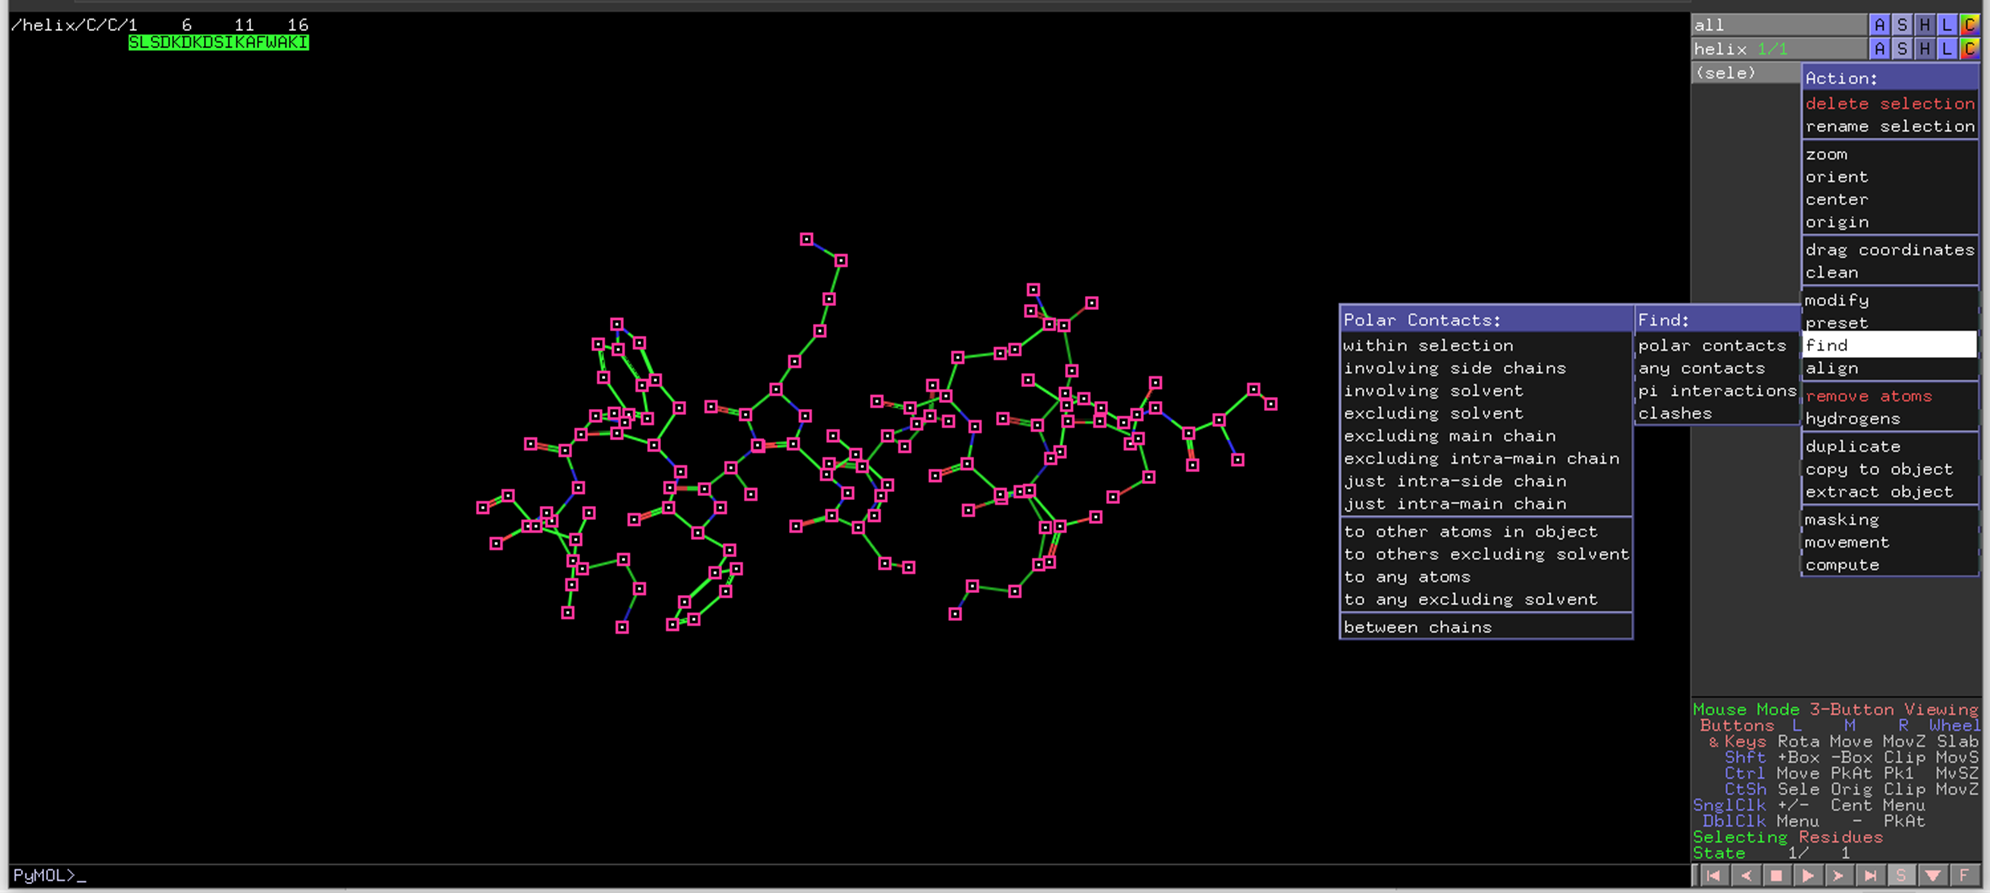

# **2.6 β-sheet secondary structures**

### 🌟 **Activity: Visualizing the Hydrogen Bonding Pattern in a Beta-Sheet Structure**

**Objective:**  
To visualize the **hydrogen bonding pattern** that stabilizes a **beta-sheet structure** using PyMOL.

### **Steps to Perform the Activity**

#### **Step 1: Load the Protein with a Beta-Sheet Structure**
1. **Fetch Protein Structure:**
   
   Use the PyMOL **command line** to fetch the PDB file for the protein:
     ```
     PyMol> fetch 5GV0
     ```

#### **Step 2: Display the Protein Sequence**
1. **Show Sequence in GUI Mode:**
   - Navigate to:  
     `Display > Sequence`
   - The `protein sequence` is now displayed at the top of the PyMOL interface.

2. **Select Only the Protein Sequence:**
   - Select the sequence (beta-sheet portion) using the **left mouse button**.
   - Hide all unselected portions:
     ```
     PyMol> hide unselected
     ```

#### **Step 3: Highlight Hydrogen Bonds**
1. **Find Polar Contacts:**
   - With the protein sequence selected:
     
     Navigate to:  
       `Sele > Action > Find > Polar Contacts > Within Selection`
   - The **hydrogen bonds** (yellow lines) are now displayed.

#### **Step 4: Analyze the Beta-Sheet Hydrogen Bonding**
1. **Careful Observation:**
   - Observe the **hydrogen bonding pattern** between the strands of the beta-sheet.  
   - The bonds are arranged **like a ladder**, stabilizing the beta-sheet structure.

2. **Key Characteristics:**
   - **Inter-chain Hydrogen Bonds:** Hydrogen bonds form between adjacent chains of the beta-sheet.
   - **Stabilization:** This bonding provides the structural integrity necessary for the beta-sheet.

### **Understanding the Visualization**
- **Hydrogen Bonds (Yellow Lines):** These bonds connect the **backbone atoms** of neighboring strands in the beta-sheet.
- **Ladder-Like Pattern:**  The hydrogen bonds are parallel, forming a ladder-like structure that stabilizes the beta-sheet.

# **2.7 β-turn structure**

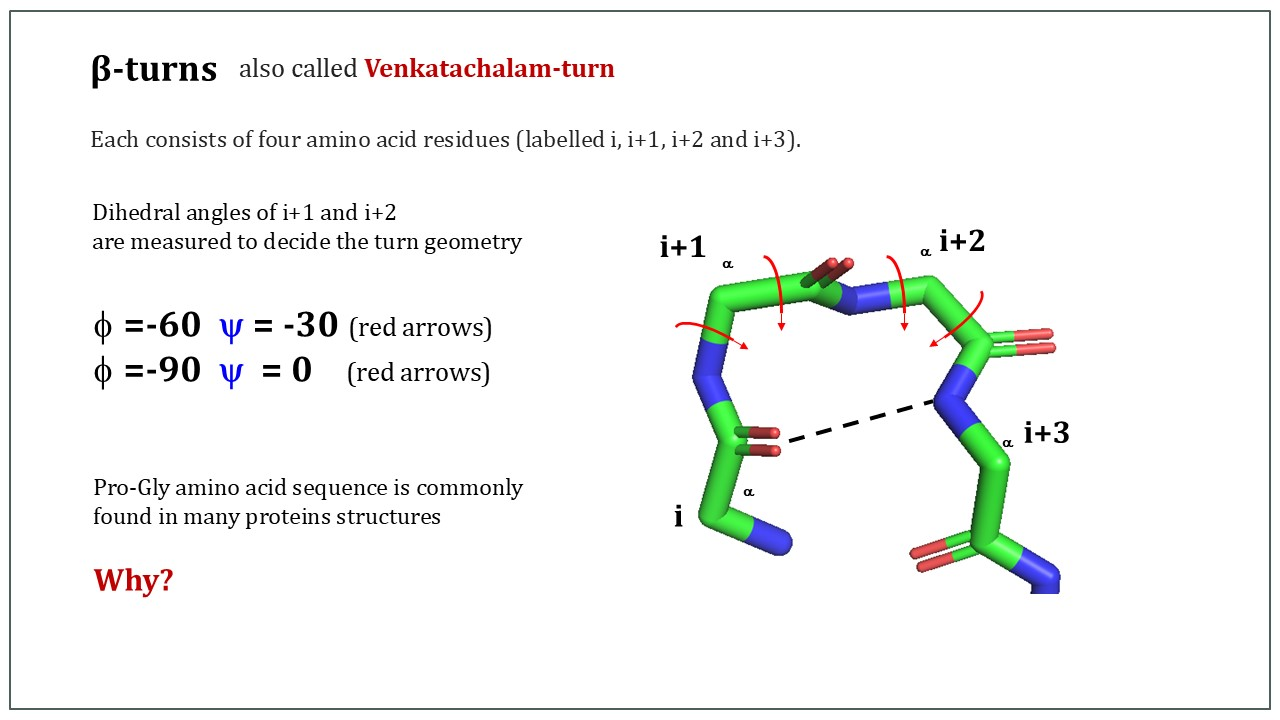

In proteins, beta turns usually occur when the protein chain reverses its direction. Beta turns typically expose the corner amino acids to the outward of the protein core structure so that these regions can also bind to other receptors.


### 🌟 **Activity: Visualizing the Beta-Turn in a Protein Structure**

**Objective:**  
To identify and visualize a **beta-turn** structure in the hemoglobin protein using PyMOL.

### **Steps to Perform the Activity**

#### **Step 1: Load the Hemoglobin Protein Structure**
1. **Fetch the PDB File:** Use the PyMOL **command line** to fetch the hemoglobin structure:
     ```
     PyMol> fetch 3BCQ
     ```

#### **Step 2: Simplify the Structure**
1. **Delete Unnecessary Chains:** Remove chains **B, C, and D** to focus on chain **A**:
     ```
     PyMol> remove chain B+C+D
     ```

2. **Delete Residues Outside the Range of Interest:** Remove residues **1 to 30** and **71 to the end**:
     ```
     PyMol> remove resi 1-30
     PyMol> remove resi 71-999
     ```

#### **Step 3: Focus on the Beta-Turn**
1. **Identify the Beta-Turn Residues:** The loop structure from residues **44 to 53** contains the beta-turn between two helices.

2. **Select Key Residues in the Beta-Turn:** Select residues **50, 51, 52, and 53**:
     ```
     PyMol> select resi 50+51+52+53
     ```

3. **Display the Beta-Turn in Stick Representation:** Set the display mode to **sticks** for the selected residues:
     ```
     PyMol> show sticks, sele
     ```

4. **Label the Selected Residues:** Add labels to the residues:
     ```
     PyMol> label sele, resn+resi
     ```

#### **Step 4: Analyze the Beta-Turn**
1. **Observe the Structure:**
   Notice that the selected residues (**Ser50, Pro51, Gly52, Ser53**) form a **beta-turn**. This structure **reverses the direction** of the protein chain between two helices.

2. **Key Features of the Beta-Turn:**
   Beta-turns are **stabilized structures** that allow sharp directional changes in the protein chain. The turn structure ensures the protein retains its compact and functional shape.

#### **Understanding the Visualization**
- **Beta-Turn Residues (Ser50-Pro51-Gly52-Ser53):** These residues are critical for stabilizing the corner structure of the protein.
- **Function of the Beta-Turn:** This specific turn connects two helices and maintains the compact architecture of the hemoglobin molecule.